## Rentables for Project Comp257 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [3]:
LGA = pd.read_excel('data/Rent-Tables-clean.xlsx', sheet_name= 0)
print("Shape of LGA: ",LGA.shape)

Shape of LGA:  (33067, 15)


In [4]:
LGA.replace(to_replace="y",value="",inplace=True)
LGA.head(200)

,GMR (Greater Metropolitan Region),Greater Sydney,Rings,LGA (Local Government Areas),Dwelling Types,Bedroom Numbers,First Quartile Weekly Rent for New Bonds\n$,Median Weekly Rent for New Bonds\n$,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total Bonds Held\nNo.,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
0,Total,Total,Inner Ring,Total,Total,Total,500.0,640.0,800.0,15938.0,157667.0,-0.0154,-0.0078,-0.1501,0.0460
1,Total,Total,Inner Ring,Total,Total,Bedsitter,350.0,405.0,480.0,594.0,6062.0,-0.0581,0.0062,-0.2326,-0.1134
2,Total,Total,Inner Ring,Total,Total,1 Bedroom,450.0,530.0,610.0,5723.0,46592.0,-0.0185,-0.0185,-0.1513,0.0037
3,Total,Total,Inner Ring,Total,Total,Not Specified,420.0,580.0,750.0,694.0,14739.0,0.0000,-0.0333,-0.1506,-0.1608
4,Total,Total,Inner Ring,Total,Total,2 Bedrooms,600.0,700.0,800.0,6386.0,65131.0,0.0000,-0.0278,-0.1400,0.1066
5,Total,Total,Inner Ring,Total,Total,3 Bedrooms,825.0,950.0,1150.0,1933.0,19508.0,-0.0052,-0.0306,-0.1625,0.1122
6,Total,Total,Inner Ring,Total,Total,4 or more Bedrooms,1024.0,1250.0,1584.0,608.0,5635.0,-0.0385,-0.0385,-0.1124,0.1493
7,Total,Total,Inner Ring,Total,House,Total,695.0,860.0,1150.0,1941.0,16275.0,0.0118,-0.0171,-0.1520,0.0997
8,Total,Total,Inner Ring,Total,House,Bedsitter,398.0,470.0,610.0,43.0,222.0,-0.1455,-0.0553,0.1622,0.2647
9,Total,Total,Inner Ring,Total,House,1 Bedroom,400.0,500.0,596.0,176.0,1183.0,-0.0909,-0.0909,-0.3358,0.0353


In [5]:
postcode = pd.read_excel('data/Rent-Tables-clean.xlsx', sheet_name=1)
print("Shape of postcode: ",postcode.shape)
postcode.head()

Shape of postcode:  (16481, 12)


,Postcode,Dwelling Types,Bedroom Numbers,First Quartile Weekly Rent for New Bonds\n$,Median Weekly Rent for New Bonds\n$,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total Bonds Held\nNo.,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
0,2505,Other,Total,50.0,53.0,55.0,30.0,80.0,0.0500,0.1932,15.0000,0.7778
1,2033,Other,Total,90.0,180.0,413.0,30.0,238.0,-0.4375,-0.2941,-0.2143,-0.3125
2,2739,Total,4 or more Bedrooms,95.0,110.0,110.0,30.0,36.0,0.0000,0.0000,0.6923,0.1000
3,2739,House,4 or more Bedrooms,95.0,110.0,110.0,30.0,36.0,0.0000,0.0000,0.6923,0.1000
4,2710,Total,1 Bedroom,108.0,120.0,148.0,30.0,71.0,0.0000,0.0000,-0.4286,-0.2000


In [6]:
LGA.dtypes

GMR (Greater Metropolitan Region)               object
Greater Sydney                                  object
Rings                                           object
LGA (Local Government Areas)                    object
Dwelling Types                                  object
Bedroom Numbers                                 object
First Quartile Weekly Rent for New Bonds\n$    float64
Median Weekly Rent for New Bonds\n$            float64
Third Quartile Weekly Rent for New Bonds\n$    float64
New Bonds Lodged\nNo.                          float64
Total Bonds Held\nNo.                          float64
Quarterly change in Median Weekly Rent         float64
Annual change in Median Weekly Rent            float64
Quarterly change in New Bonds Lodged           float64
Annual change in New Bonds Lodged              float64
dtype: object

In [7]:
LGA.columns

Index(['GMR (Greater Metropolitan Region)', 'Greater Sydney', 'Rings',
       'LGA (Local Government Areas)', 'Dwelling Types', 'Bedroom Numbers',
       'First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.', 'Quarterly change in Median Weekly Rent',
       'Annual change in Median Weekly Rent',
       'Quarterly change in New Bonds Lodged',
       'Annual change in New Bonds Lodged'],
      dtype='object')

In [8]:
LGA.rename(columns={'GMR (Greater Metropolitan Region)':'GMR',
                    'Greater Sydney':'Greater_Sydney',
                    'LGA (Local Government Areas)':'LGA',
                    'Dwelling Types':'Dwelling_Types',
                    'Bedroom Numbers':'Bedroom_Numbers'},
           inplace=True)

### Renaming Columns and determinig correlation

In [9]:
LGA_clean =  LGA[LGA.Bedroom_Numbers != 'Total']

In [10]:
LGA_clean =  LGA_clean[LGA_clean.Dwelling_Types != 'Total']

In [11]:
LGA_clean = LGA_clean[LGA_clean.LGA != 'Total']

In [12]:
LGA_clean.shape

(20848, 15)

C:\Users\mukit\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\mukit\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


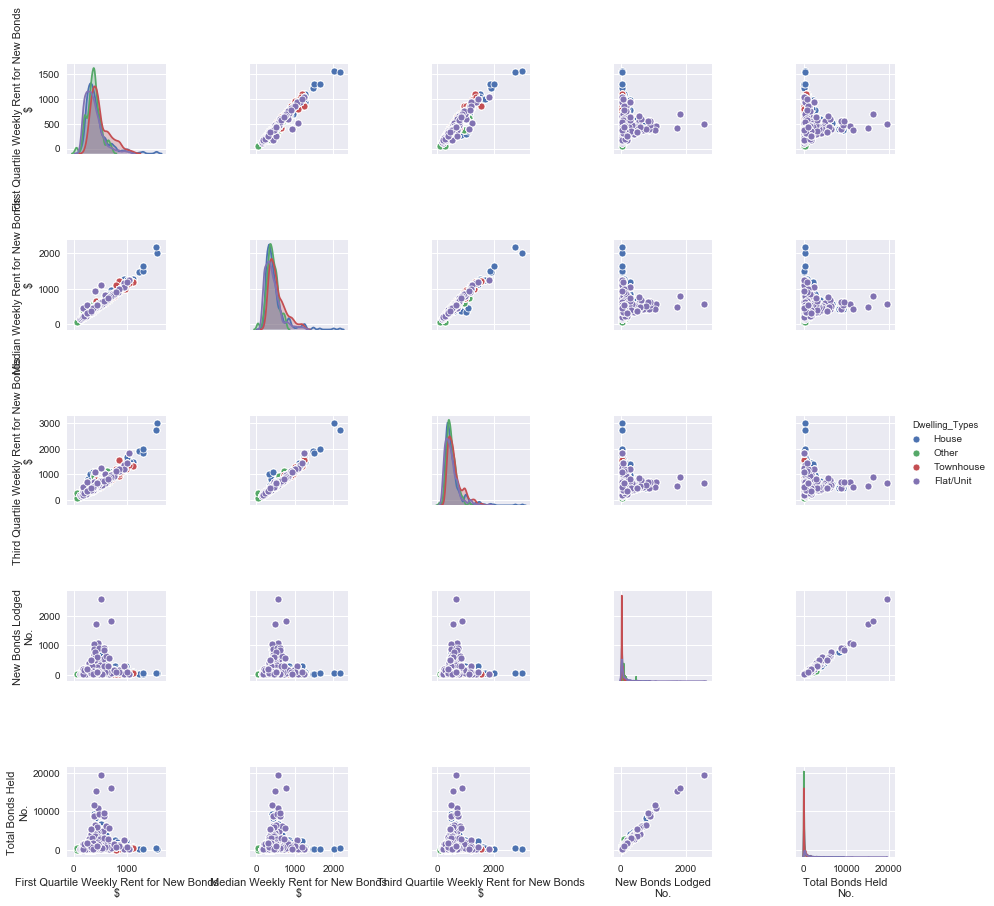

In [13]:
g = sns.pairplot(LGA_clean,vars=['First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.'],hue='Dwelling_Types')

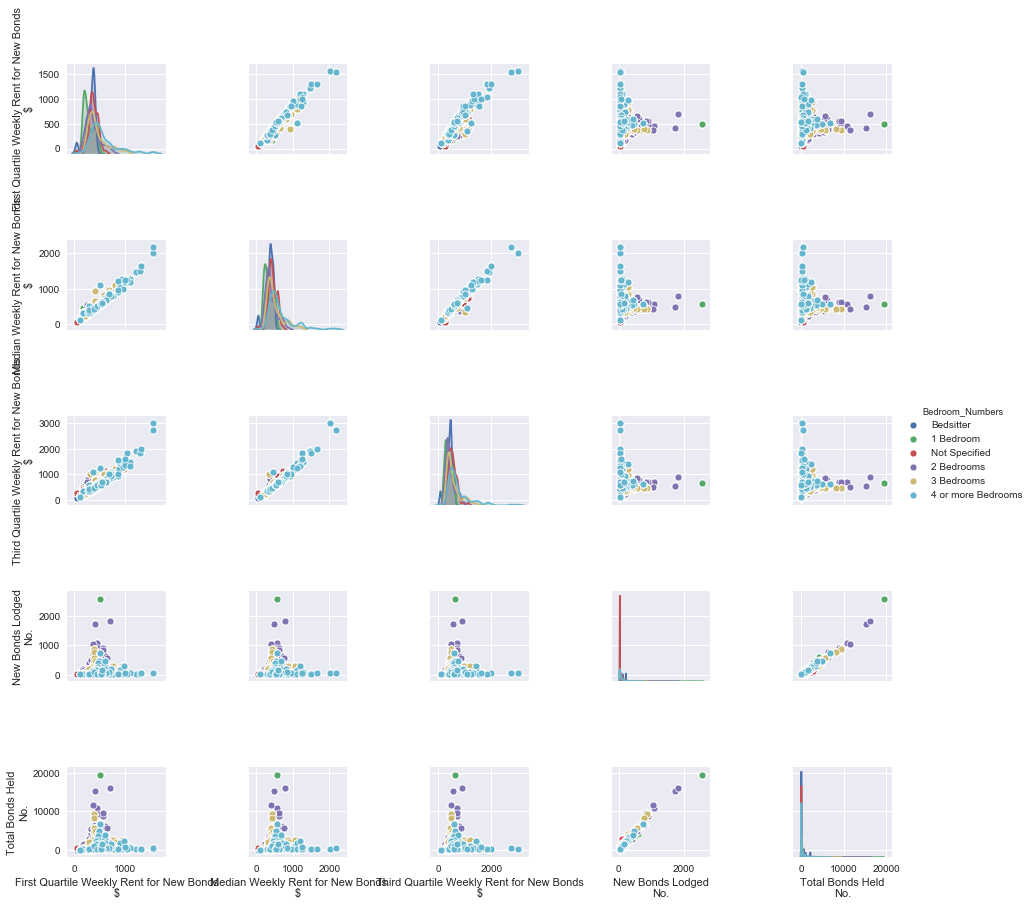

In [26]:
g = sns.pairplot(LGA_clean,vars=['First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.'], hue='Bedroom_Numbers')

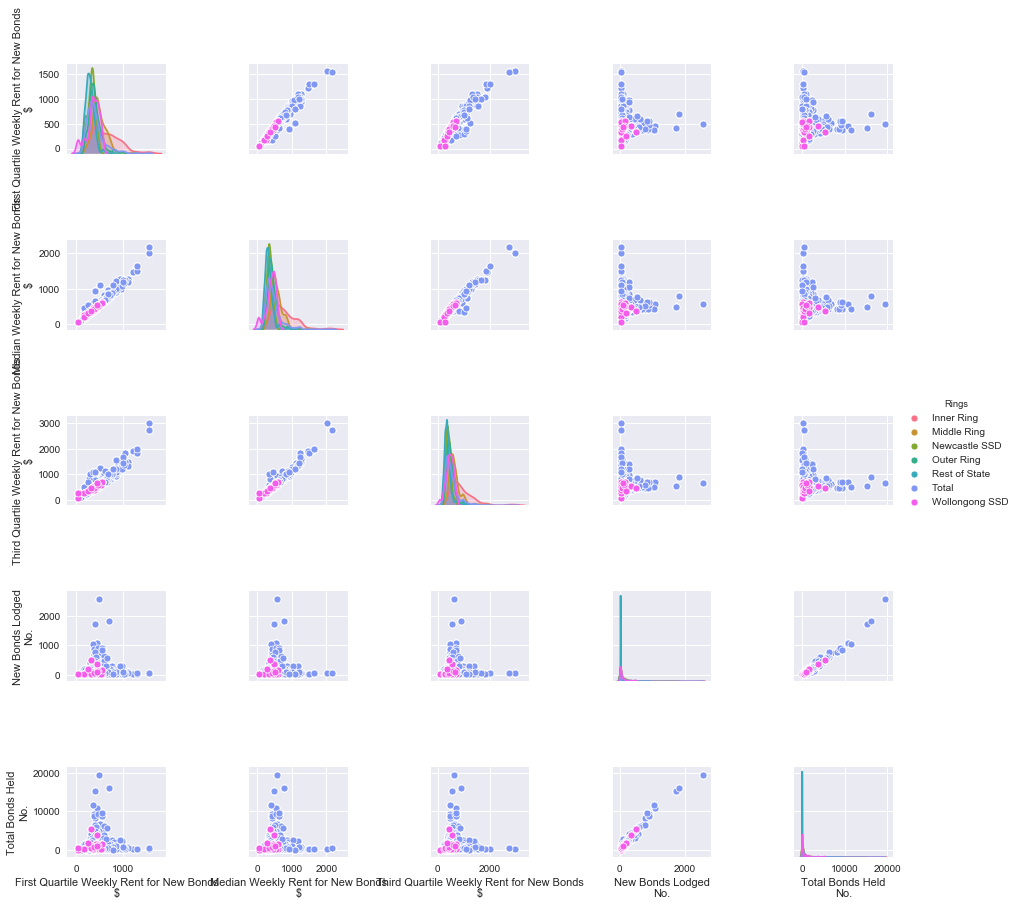

In [27]:
g = sns.pairplot(LGA_clean,vars=['First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.'], hue='Rings')

In [28]:
LGA_clean.describe()

,First Quartile Weekly Rent for New Bonds\n$,Median Weekly Rent for New Bonds\n$,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total Bonds Held\nNo.,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
count,6144.000000,6144.000000,6144.000000,6144.000000,14040.000000,6128.000000,6136.000000,6128.000000,6136.000000
mean,408.313802,465.692708,533.290365,97.917969,436.194872,-0.001098,-0.006369,0.079683,0.152504
std,191.751186,231.432171,289.484531,182.668190,1192.639839,0.161992,0.091915,0.464695,1.061455
min,50.000000,55.000000,85.000000,30.000000,30.000000,-0.872100,-0.862500,-0.721500,-0.705100
25%,290.000000,320.750000,359.500000,30.000000,34.000000,-0.042900,-0.049000,-0.181800,-0.130400
50%,368.000000,410.000000,460.000000,35.000000,95.000000,-0.006350,-0.011500,-0.012850,0.035700
75%,471.500000,530.000000,603.500000,87.250000,323.000000,0.021300,0.034700,0.215700,0.223300
max,1550.000000,2175.000000,3000.000000,2571.000000,19439.000000,2.755100,0.756800,6.000000,25.000000


### Data Cleaning postcode dataframe

In [15]:
postcode.rename(columns={'Bedroom Numbers':'Bedroom_Numbers'}, inplace=True)

In [16]:
postcode.rename(columns={'Dwelling Types':'Dwelling_Types'}, inplace=True)

In [17]:
postcode_clean =  postcode[postcode.Bedroom_Numbers != 'Total']

In [18]:
postcode_clean =  postcode_clean[postcode.Dwelling_Types != 'Total']

C:\Users\mukit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [21]:
print(postcode_clean.shape)
postcode_clean.head(200)

(10291, 12)


,Postcode,Dwelling_Types,Bedroom_Numbers,First Quartile Weekly Rent for New Bonds\n$,Median Weekly Rent for New Bonds\n$,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total Bonds Held\nNo.,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
3,2739,House,4 or more Bedrooms,95.0,110.0,110.0,30.0,36.0,0.0000,0.0000,0.6923,0.1000
8,2307,Other,1 Bedroom,125.0,150.0,190.0,30.0,44.0,-0.2857,0.5000,-0.3478,4.0000
12,2641,Flat/Unit,1 Bedroom,133.0,160.0,170.0,30.0,66.0,-0.0857,0.0159,0.2222,1.7500
14,2350,House,1 Bedroom,135.0,165.0,200.0,30.0,69.0,0.0313,-0.0294,-0.3810,-0.1333
16,2710,Flat/Unit,2 Bedrooms,140.0,150.0,173.0,30.0,208.0,0.0000,-0.0625,-0.1579,-0.2381
18,2287,Other,1 Bedroom,143.0,163.0,179.0,30.0,132.0,-0.0152,0.0833,-0.6944,-0.1852
22,2835,Flat/Unit,2 Bedrooms,147.0,180.0,195.0,30.0,93.0,0.0000,0.0000,0.2500,0.3636
25,2400,House,2 Bedrooms,150.0,215.0,250.0,30.0,61.0,-0.1650,-0.0652,1.0000,0.0909
26,2400,Flat/Unit,2 Bedrooms,150.0,175.0,205.0,30.0,275.0,-0.0278,-0.1250,-0.2000,-0.1724
30,2871,Flat/Unit,2 Bedrooms,150.0,205.0,220.0,30.0,187.0,0.0789,0.0380,-0.2353,-0.2778


In [37]:
postcode_clean.columns

Index(['Postcode', 'Dwelling_Types', 'Bedroom_Numbers',
       'First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.', 'Quarterly change in Median Weekly Rent',
       'Annual change in Median Weekly Rent',
       'Quarterly change in New Bonds Lodged',
       'Annual change in New Bonds Lodged'],
      dtype='object')

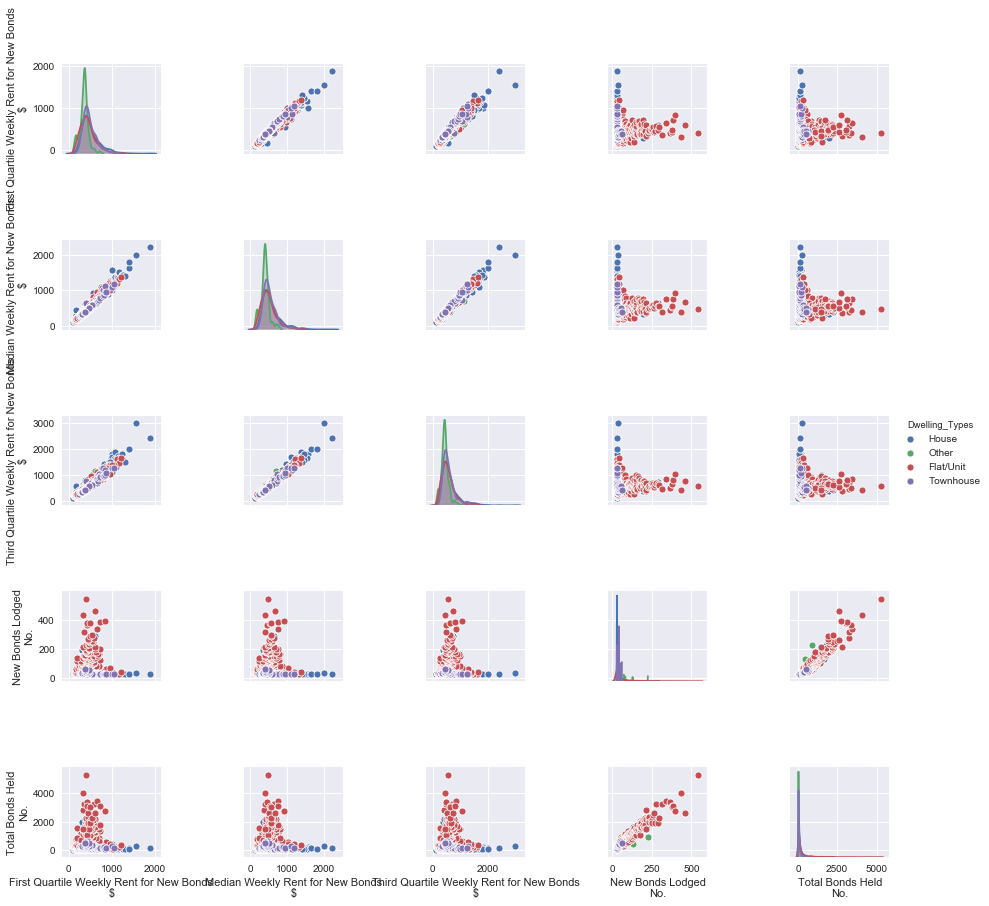

In [38]:
g = sns.pairplot(postcode_clean,vars=['First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.'],hue='Dwelling_Types')

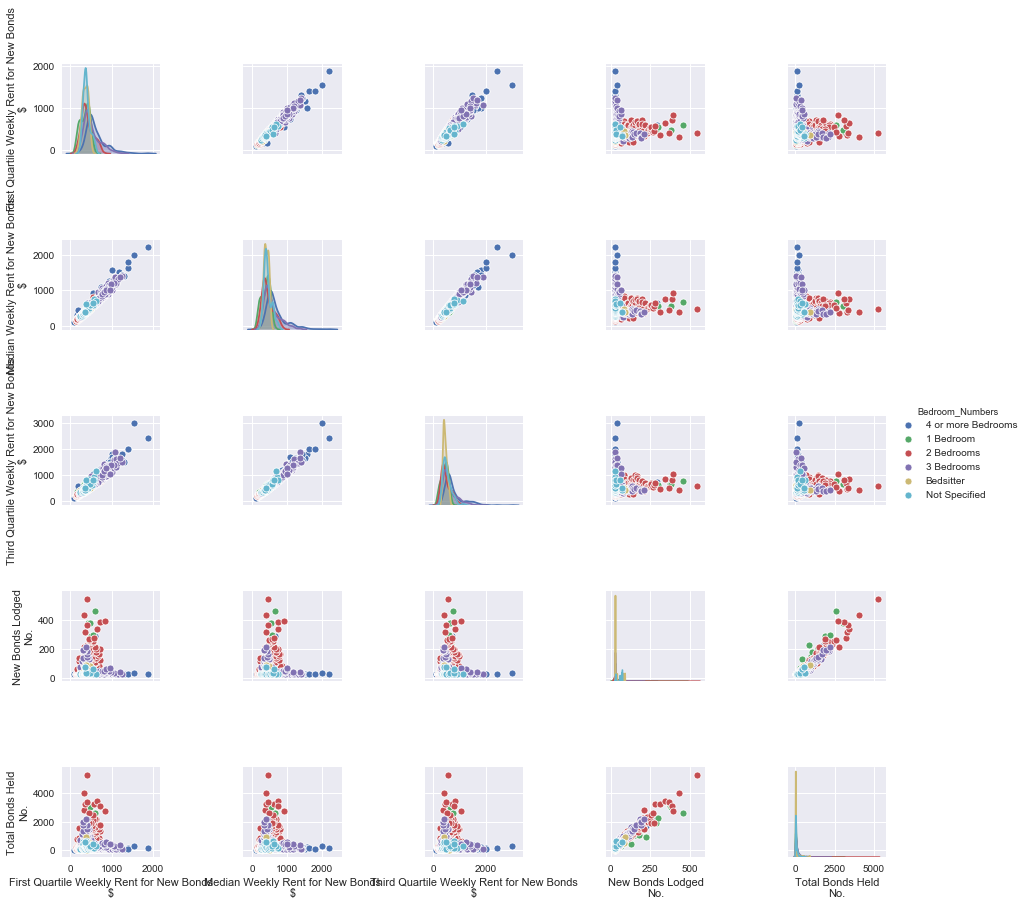

In [39]:
g = sns.pairplot(postcode_clean,vars=['First Quartile Weekly Rent for New Bonds\n$',
       'Median Weekly Rent for New Bonds\n$',
       'Third Quartile Weekly Rent for New Bonds\n$', 'New Bonds Lodged\nNo.',
       'Total Bonds Held\nNo.'],hue='Bedroom_Numbers')

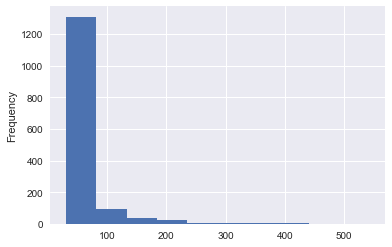

In [40]:
dfNB= postcode_clean['New Bonds Lodged\nNo.']
dfNB.plot.hist()

In [41]:
postcode_clean.describe()

,Postcode,First Quartile Weekly Rent for New Bonds\n$,Median Weekly Rent for New Bonds\n$,Third Quartile Weekly Rent for New Bonds\n$,New Bonds Lodged\nNo.,Total Bonds Held\nNo.,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
count,10291.000000,1485.000000,1485.000000,1485.000000,1485.000000,4134.000000,1483.000000,1483.000000,1483.000000,1483.000000
mean,2374.929550,471.542088,525.028956,584.544108,49.010774,176.235607,-0.003885,-0.007564,0.142599,0.254852
std,278.292417,197.255138,233.315061,278.498330,48.298891,325.771549,0.126409,0.083379,0.695809,0.697790
min,1360.000000,95.000000,110.000000,110.000000,30.000000,30.000000,-0.350600,-0.450000,-0.863600,-0.924200
25%,2142.000000,350.000000,378.000000,408.000000,30.000000,39.000000,-0.045650,-0.051700,-0.191000,-0.083800
50%,2320.000000,430.000000,473.000000,519.000000,30.000000,72.000000,-0.005600,-0.010100,0.000000,0.100000
75%,2570.000000,550.000000,610.000000,675.000000,43.000000,162.000000,0.023850,0.026350,0.285700,0.382250
max,5341.000000,1875.000000,2225.000000,3000.000000,544.000000,5289.000000,2.840000,0.688300,12.000000,10.000000
